In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [79]:
velha = pd.read_csv('amostras_.csv',sep=';')

In [80]:
X = velha.drop(columns=['classe'])
y = velha['classe'].values


In [81]:
treino_X, teste_X, treino_y, teste_y = tts(X, y, random_state=42,test_size=0.1, stratify=y)
tr_X, v_X, tr_y, v_y = tts(treino_X, treino_y, random_state=42,test_size=0.1, stratify=treino_y)
print(v_X.shape)
print(teste_X.shape)


(68, 9)
(75, 9)


Validacao Cruzada com GridSearchCV

In [82]:
param_grid = {'n_neighbors': range(2, 20)}

grid = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=10,         # 10-fold cross-validation
    scoring='accuracy'
)
grid.fit(tr_X, tr_y)
print("Melhor k:", grid.best_params_)
print("Acurácia média de validação:", grid.best_score_)

Melhor k: {'n_neighbors': 13}
Acurácia média de validação: 0.7181967213114755


Validacao Explicita (10%)

In [83]:
melhor_k = None
melhor_acc = 0 
k_values = []
accuracies=[]
for k in range(2, 20):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(tr_X, tr_y)
    acc = clf.score(v_X,v_y)
    k_values.append(k)
    accuracies.append(acc)

    if acc > melhor_acc:
        melhor_acc = acc
        melhor_k = k
print(f'Melhor acuracia: {melhor_acc}')
print("Melhor k encontrado:", melhor_k)

Melhor acuracia: 0.7205882352941176
Melhor k encontrado: 11


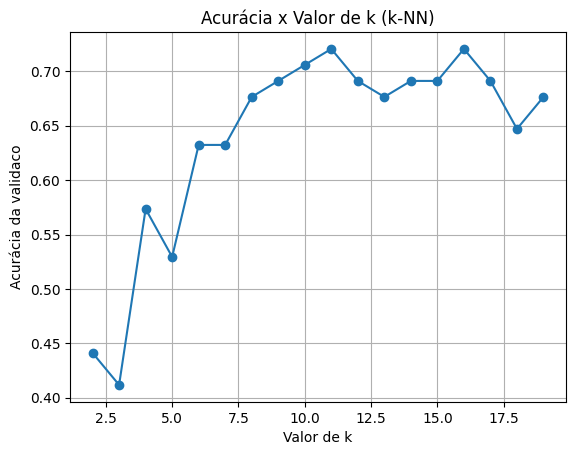

In [84]:
plt.plot(k_values, accuracies, marker="o")
plt.xlabel("Valor de k")
plt.ylabel("Acurácia da validaco")
plt.title("Acurácia x Valor de k (k-NN)")
plt.grid(True)
plt.show()

SCORE COM K VIA VALIDACAO EXPLICITA

In [85]:
clf = neighbors.KNeighborsClassifier(n_neighbors=melhor_k)
clf.fit(tr_X, tr_y)
accs = clf.score(teste_X, teste_y)
print("Acuracia: ", accs)

Acuracia:  0.7333333333333333


SCORE COM K VIA VALIDACAO CRUZADA

In [86]:
accs = grid.score(teste_X,teste_y)
print("Acuracia: ", accs)

Acuracia:  0.76


In [87]:
k_values = []
accuracies = []
maior = -1.0
melhor_k = None
melhor_pred = None

for k in range(2, 20):
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)
    clf.fit(tr_X, tr_y)                 # DataFrame/Series
    acc = clf.score(teste_X, teste_y)           # DataFrame/Series (sem .values)

    # predição vetorial (mais rápido e sem warnings)
    y_pred = clf.predict(teste_X)

    print(f"k = {k} acuracia = {acc:.4f}")
    print("Acertos:", (y_pred == teste_y).sum())
    print("Erros:", len(teste_y) - (y_pred == teste_y).sum())
    print("Acuracia:", acc)

    k_values.append(k)
    accuracies.append(acc)
    if acc > maior:
        maior = acc
        melhor_k = k
        melhor_pred = y_pred

print("Melhor k:", melhor_k)
print("Maior acuracia:", maior)

k = 2 acuracia = 0.4533
Acertos: 34
Erros: 41
Acuracia: 0.4533333333333333
k = 3 acuracia = 0.4533
Acertos: 34
Erros: 41
Acuracia: 0.4533333333333333
k = 4 acuracia = 0.5200
Acertos: 39
Erros: 36
Acuracia: 0.52
k = 5 acuracia = 0.4667
Acertos: 35
Erros: 40
Acuracia: 0.4666666666666667
k = 6 acuracia = 0.6267
Acertos: 47
Erros: 28
Acuracia: 0.6266666666666667
k = 7 acuracia = 0.6000
Acertos: 45
Erros: 30
Acuracia: 0.6
k = 8 acuracia = 0.6533
Acertos: 49
Erros: 26
Acuracia: 0.6533333333333333
k = 9 acuracia = 0.6933
Acertos: 52
Erros: 23
Acuracia: 0.6933333333333334
k = 10 acuracia = 0.7200
Acertos: 54
Erros: 21
Acuracia: 0.72
k = 11 acuracia = 0.7333
Acertos: 55
Erros: 20
Acuracia: 0.7333333333333333
k = 12 acuracia = 0.7733
Acertos: 58
Erros: 17
Acuracia: 0.7733333333333333
k = 13 acuracia = 0.7600
Acertos: 57
Erros: 18
Acuracia: 0.76
k = 14 acuracia = 0.7733
Acertos: 58
Erros: 17
Acuracia: 0.7733333333333333
k = 15 acuracia = 0.7333
Acertos: 55
Erros: 20
Acuracia: 0.7333333333333333
k

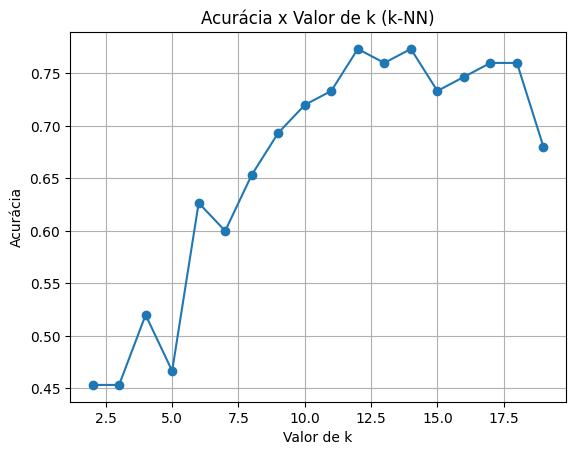

In [88]:
plt.plot(k_values, accuracies, marker="o")
plt.xlabel("Valor de k")
plt.ylabel("Acurácia")
plt.title("Acurácia x Valor de k (k-NN)")
plt.grid(True)
plt.show()

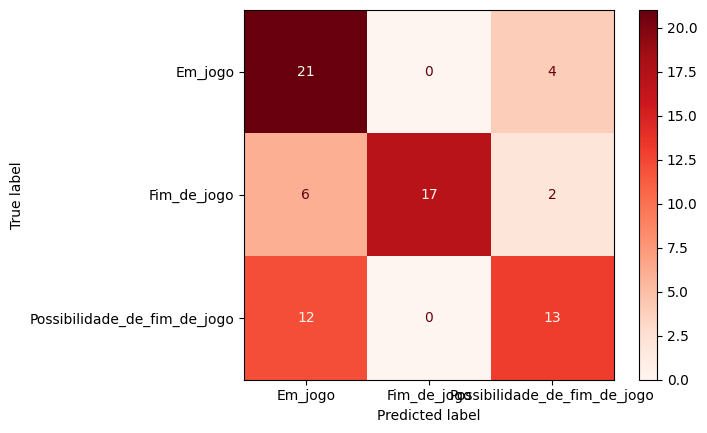

In [89]:
y_pred = clf.predict(teste_X)  # usa DataFrame com nomes de features

cm = confusion_matrix(teste_y, y_pred, labels=clf.classes_)  # garante mesma ordem
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap='Reds')